<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/U1_S1_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from numpy.linalg import eig

In [0]:
# !pip install seaborn==0.9.0 -q

In [0]:
import seaborn as sns

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

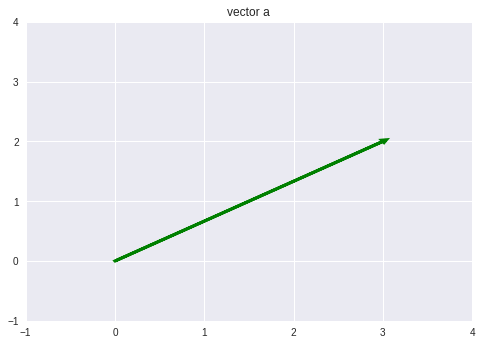

In [3]:
# Axis Bounds
plt.xlim(-1,4)          
plt.ylim(-1,4)

#  Vector
a = [3,2] 

# Plot Vector
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Vector a")
plt.show()


## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


$||\vec{b}||$ = $\sqrt{17^2 + 4^2 + 2^2 +1^2}$ =  $\sqrt{310}$ = 17.606

norm of a vercor represents it's magnitude, or length in other words

In [0]:
#check the calculation:
b = [17, -4, -2, 1]
norm = np.linalg.norm(b)
print(norm)

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

$\vec{c} \cdot \vec{d}$ = 27 - 49 - 8 + 72 = 42

In [57]:
#check the calculation:
c = [3,7,-2,12]
d = [9,-7,4,6]

c_dot_d = np.dot(c,d)
print('The dot product of c and d is:',c_dot_d)

The dot product of c and d is: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

$E^{T}$ = $\begin{bmatrix}
    7 & 1 & 2 \\
    4 & 3 & 6 \\
    2 & -1 & -4
\end{bmatrix}$

In [59]:
E = np.mat('7 4 2; 1 3 1; 2 6 -4')
E_inverse = np.linalg.inv(E)
E_transpose = E.getT()
print('Inverse of E: \n', E_inverse)
print('Transpose of E: \n',E_transpose)


Inverse of E: 
 [[ 0.17647059 -0.2745098   0.01960784]
 [-0.05882353  0.31372549  0.04901961]
 [ 0.          0.33333333 -0.16666667]]
Transpose of E: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2  1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [51]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df_c_s = pd.DataFrame({'customers': customers, 'snow': snow})

df_c_s.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [61]:
##### Your Code Here #####
def calcst(df):
  stats = []
  for column in df.columns:
    mean = df[column].mean()
    var = df[column].var()
    stdev = df[column].std()
    stats.append([df[column].name, mean, var, stdev])
  for i in stats:
    print('For {} column, the mean is {}, the variance is {}, and the standard deviation is {}'.format(i[0],i[1],i[2],i[3]))
#   return stats
calcst(df_c_s)
    

For customers column, the mean is 1135.7142857142858, the variance is 98761.90476190478, and the standard deviation is 314.26406851866597
For snow column, the mean is 2.7142857142857144, the variance is 8.571428571428571, and the standard deviation is 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Variances of two different dataframes are not comparable, because they might be in different units and not standardized

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [6]:
variance_covariance_matrix = df_c_s.cov()
variance_covariance_matrix

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

In [0]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

In [0]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

In [0]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
stdsc = StandardScaler()

#standartize the X dataframe
X_std = stdsc.fit_transform(X)
X_std

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####
### Find eigenvactors, eigenvalues, and projected data for 2 PCA components

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)
print('\n Projected Data: \n', X_pca)

pca.fit(X)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

In [19]:
x_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
x_pca_df.head()

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


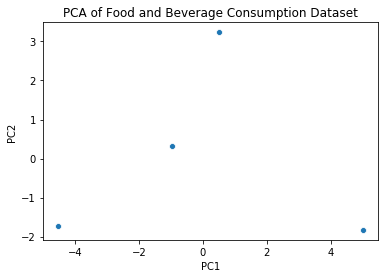

In [63]:
### Plot PC1 against PC2
fig, ax = plt.subplots()

sns.scatterplot(ax=ax, x='PC1', y='PC2', data=x_pca_df)
ax.set_title('PCA of Food and Beverage Consumption Dataset')

plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [20]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

In [0]:
##### Your Code Here #####
from sklearn.cluster import KMeans 
from numpy.linalg import eig

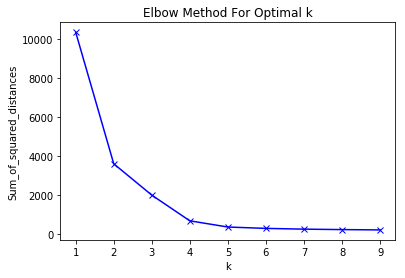

In [24]:
# First, let's see, what number of clusters we want to use
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
    
# graphing sum of squared distances
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the plot above, it looks like 5 clusters would be appropriate. 

#### First, let's apply PCA to the data

In [0]:
points_pca = pca.fit_transform(points)
print('\n Projected Data: \n', points_pca)

pca.fit(points)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

In [65]:
points_pca_df = pd.DataFrame(points_pca, columns=['PC1', 'PC2'])
points_pca_df.head()

,PC1,PC2
0,-2.797536,-4.762657
1,-3.608286,0.692943
2,-4.307011,5.002809
3,-3.619255,-2.603139
4,-4.645542,4.492825


#### Clustering After PCA

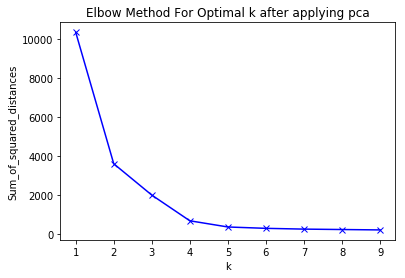

In [66]:
#Let's check what number of clusters would be appropriate after applying PCA
sum_of_squared_distances_after_pca = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points_pca_df)
    sum_of_squared_distances_after_pca.append(km.inertia_)
plt.plot(K, sum_of_squared_distances_after_pca, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k after applying pca')
plt.show()

Still, 5 clusters seem to be fitting the data

In [0]:
# kmeans with k=3
km5 = KMeans(n_clusters=5)
km5 = km5.fit(points_pca_df)
points_pca_df_kmeans = km5.predict(points_pca_df)

#find the centers of clusters
centers = km5.cluster_centers_

#add the cluster column to the initial dataframe
points_pca_df['K5 Cluster'] = km5.labels_ 

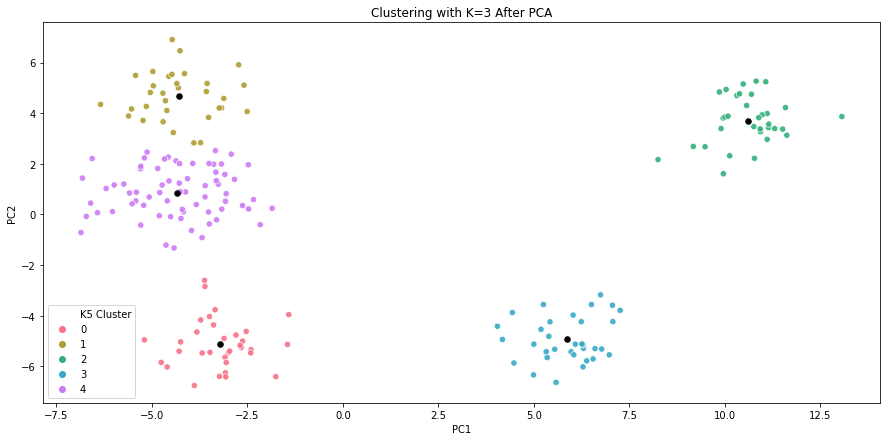

In [77]:
#Plot the clusters with centers

fig, ax = plt.subplots(figsize=(15,7))

palette = sns.color_palette("husl", 5)

sns.scatterplot(ax=ax, 
                x='PC1', 
                y='PC2', 
                data=points_pca_df, 
                hue='K5 Cluster',
                palette=palette,
                alpha=0.9, 
                s = 40,
                legend='full')

ax.scatter(centers[:, 0], centers[:, 1], c='black', s=30);
ax.set_title('Clustering with K=3 After PCA')

plt.show();